## MNIST 데이터셋 RandomForest로 분류하기

#### 라이브러리 및 패키지 불러오기

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(2021) #실행할 때마다 동일한 난수 시퀀스가 생성

from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

C:\Users\user\AppData\Local\Temp\ipykernel_20616\3728861573.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


#### 데이터 불러오기

In [2]:
digits = load_digits() #데이터셋에서 data와 target을 추출 / data는 8x8 픽셀 이미지로 표현된 숫자 이미지 데이터이며, target은 해당 이미지가 나타내는 숫자 레이블을 뜻함
data, target = digits["data"], digits["target"] #data와 target 변수에 각각 이미지 데이터와 레이블을 저장

print('픽셀 값:', data[0])
print('타겟 변수 값:', target[0])

픽셀 값: [ 0.  0.  5. 13.  9.  1.  0.  0.  0.  0. 13. 15. 10. 15.  5.  0.  0.  3.
 15.  2.  0. 11.  8.  0.  0.  4. 12.  0.  0.  8.  8.  0.  0.  5.  8.  0.
  0.  9.  8.  0.  0.  4. 11.  0.  1. 12.  7.  0.  0.  2. 14.  5. 10. 12.
  0.  0.  0.  0.  6. 13. 10.  0.  0.  0.]
타겟 변수 값: 0


#### 원본 데이터 시각화

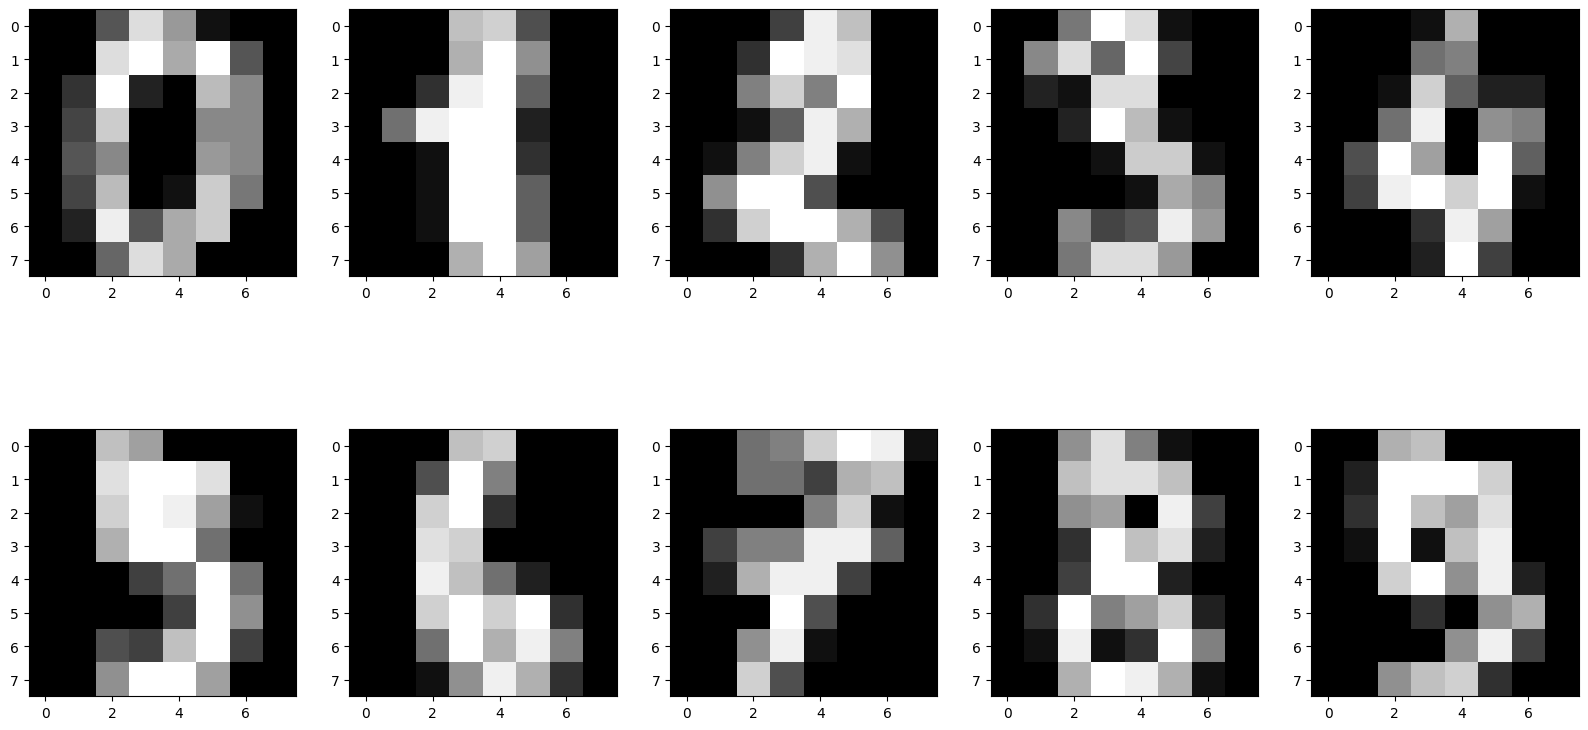

In [3]:
samples = data[:10].reshape(10, 8, 8)
fig, axes = plt.subplots(nrows=2, ncols=5, figsize=(20, 10))
for idx, sample in enumerate(samples):
    axes[idx//5, idx%5].imshow(sample, cmap="gray")

In [4]:
train_data, test_data, train_target, test_target = train_test_split(
    data, target, train_size=0.7, random_state=2021
)
print(f"train_data size: {len(train_target)}, {len(train_target)/len(data):.2f}")
print(f"test_data size: {len(test_target)}, {len(test_target)/len(data):.2f}")

train_data size: 1257, 0.70
test_data size: 540, 0.30


#### 모델 적용

In [5]:
random_forest = RandomForestClassifier()

random_forest.fit(train_data, train_target) #학습

RandomForestClassifier()

In [6]:
# 변수 중요도 계산
feature_importance = pd.Series(random_forest.feature_importances_)

feature_importance = feature_importance.sort_values(ascending=False)
feature_importance.head(10)

21    0.046149
26    0.042105
42    0.039239
36    0.039174
43    0.036726
20    0.032388
30    0.032027
28    0.030734
33    0.030467
61    0.029491
dtype: float64

<Axes: >

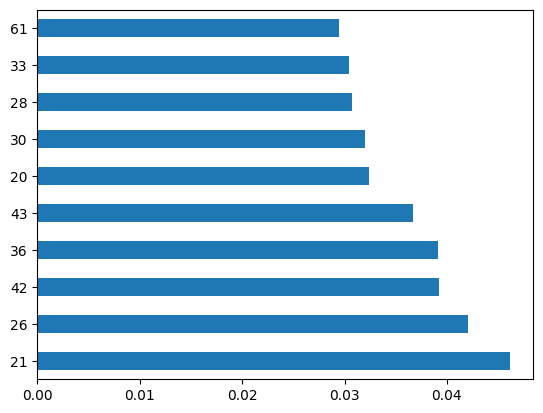

In [7]:
feature_importance.head(10).plot(kind="barh")

(-0.5, 7.5, 7.5, -0.5)

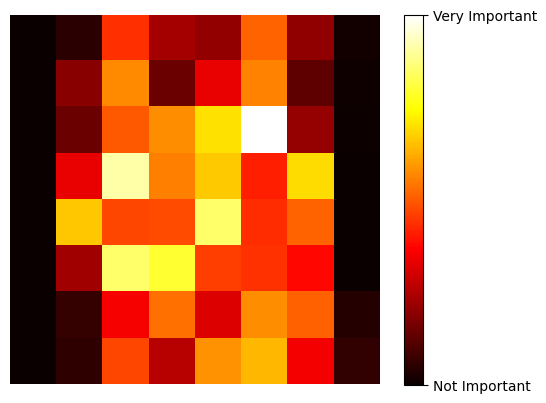

In [8]:
image = random_forest.feature_importances_.reshape(8, 8)
plt.imshow(image, cmap=plt.cm.hot, interpolation="nearest")
cbar = plt.colorbar(ticks=[random_forest.feature_importances_.min(), random_forest.feature_importances_.max()])
cbar.ax.set_yticklabels(['Not Important', 'Very Important'])
plt.axis("off")

#### 모델 평가

9

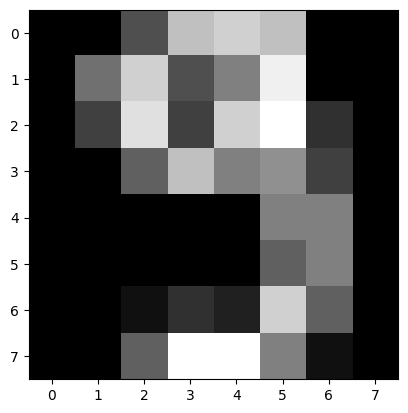

In [9]:
train_pred = random_forest.predict(train_data)
test_pred = random_forest.predict(test_data)

plt.imshow(train_data[4].reshape(8, 8), cmap="gray")
train_pred[4]

In [10]:
train_acc = accuracy_score(train_target, train_pred)
test_acc = accuracy_score(test_target, test_pred)

print(f"train accuracy is {train_acc:.4f}")
print(f"test accuracy is {test_acc:.4f}")

train accuracy is 1.0000
test accuracy is 0.9667
